In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

## if response code is 403
- headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'} -requests.get('url',headers=headers).text

In [2]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
webpage=requests.get('https://www.ambitionbox.com/list-of-companies?page=1',headers=headers).text

In [5]:
soup = BeautifulSoup(webpage,'html.parser')

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <style>
   @media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}
  </style>
  <script>
   window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date)
  </script>
  <title>
   List of companies in India | AmbitionBox
  </title>
  <meta content="2024 AmbitionBox" data-n-head="ssr" name="copyright"/>
  <meta content="1 day" data-n-head="ssr" name="revisit-after"/>
  <meta content="AmbitionBox" data-n-head="ssr" name="application-name"/>
  <meta content="EN" data-n-head="ssr" name="content-language"/>
  <meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data
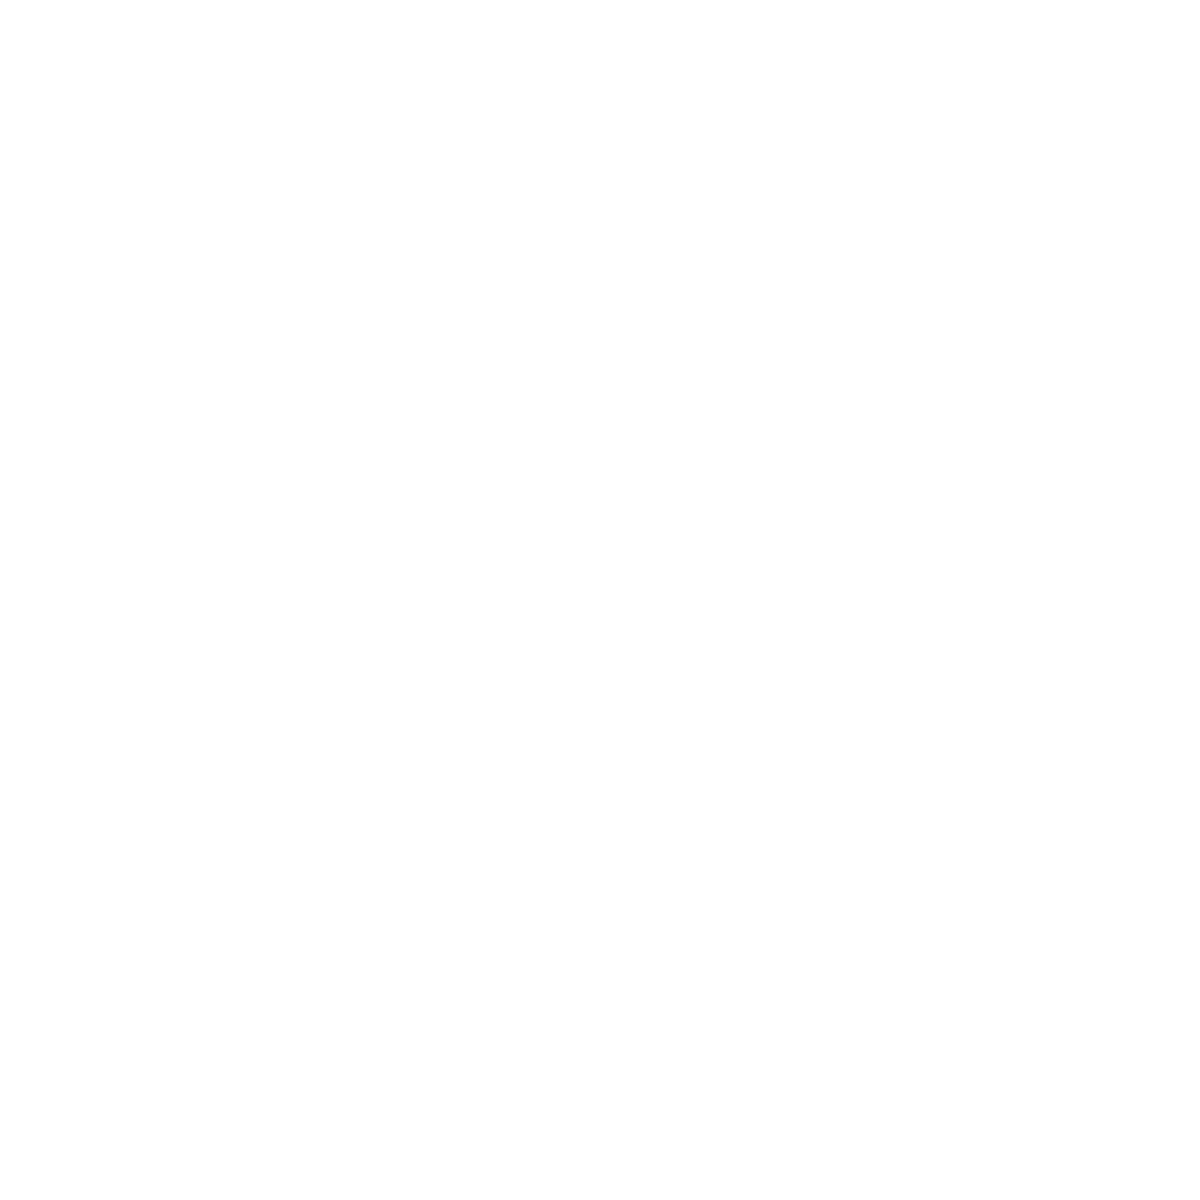

In [6]:
print(soup.prettify())

In [7]:
soup.find_all('h1')[0].text

'\n\t\t\t\t\t\t\tList of companies in India\n\t\t\t\t\t\t'

# TO FIND OUT NAMES OF THE COMPANIES

In [8]:
for i in soup.find_all('h2'):
  print(i.text.strip())

TCS
Accenture
Cognizant
Wipro
Capgemini
HDFC Bank
ICICI Bank
Infosys
HCLTech
Tech Mahindra
Genpact
Axis Bank
Teleperformance
Concentrix Corporation
Jio
Amazon
IBM
Reliance Retail
HDB Financial Services
Larsen & Toubro Limited
Companies by  Industry
Companies by  Locations
Companies by  Type
Companies by  Badges


In [9]:
for i in soup.find_all('p'):
  print(i.text.strip())

AmbitionBox
About Company
Discover best places to work
Compare & find best workplace
Bring your workplace to life
Highlight your company's perks
Read reviews for 6L+ companies
Rate your former or current company
Discover salaries for 6L+ companies
Calculate your take home salary
Check your market value
Help other jobseekers
Read interviews for 40K+ companies
Interviews questions for 1K+ colleges
Contribute your interview questions
AmbitionBox Employee Choice Awards - 3rd Edition
2nd Edition
1st Edition
Discover Best Places to Work!
9,94,272
							unique
							companies found
Sort By:
Popular
Helping over
									1 Crore
									job seekers every month in choosing their right fit company
Reviews
Salaries
Interviews
Users/Month
About Company
Made with ❤️ in India. Trademarks belong to their respective owners. All
					rights reserved © 2024 Info Edge (India) Ltd.


# TO FIND OUT THE RATINGS


In [21]:
len(soup.find_all('span',class_='companyCardWrapper__companyRatingValue'))

0

# TO FIND OUT THE NUMBER OF REVIEWS


In [11]:
len(soup.find_all('a' , class_='review-count'))

0

# CONSIDERING THE WHOLE CONTAINER


In [12]:
company=soup.find_all('div',class_='company-content-wrapper')

In [13]:
len(company) 

0

In [14]:
name=[]
rating=[]
reviews=[]
ctype=[]
hq=[]
how_old=[]
no_of_employee=[]

for i in company:

  name.append(i.find('h2').text.strip())
  rating.append(i.find('p',class_='rating').text.strip())
  reviews.append(i.find('a' , class_='review-count').text.strip())
  ctype.append(i.find_all('p',class_='infoEntity')[0].text.strip())
  hq.append(i.find_all('p',class_='infoEntity')[1].text.strip())
  how_old.append(i.find_all('p',class_='infoEntity')[2].text.strip())
  no_of_employee.append(i.find_all('p',class_='infoEntity')[3].text.strip())

df=pd.DataFrame({'name':name,
   'rating':rating,
   'reviews':reviews,
   'company_type':ctype,
   'Head_Quarters':hq,
   'Company_Age':how_old,
   'No_of_Employee':no_of_employee,
   })
  

In [15]:
name

[]

# creating dataframe for all the pages

In [18]:

final=pd.DataFrame()
for j in range(1,1001):
  webpage=requests.get('https://www.ambitionbox.com/list-of-companies?page={}'.format(j)).text
  soup=BeautifulSoup(webpage,'html.parser')
  company=soup.find_all('div',class_='company-content-wrapper')
  name=[]
  rating=[]
  reviews=[]
  ctype=[]
  hq=[]
  how_old=[]
  no_of_employee=[]

  for i in company:

    try:
       name.append(i.find('h2').text.strip())
    except:
       name.append(np.nan)

    try:
       rating.append(i.find('p',class_='rating').text.strip())
    except:
       rating.append(np.nan)
   
    try:

      reviews.append(i.find('a' , class_='review-count').text.strip())
    except:
      reviews.append(np.nan)

    try:

      ctype.append(i.find_all('p',class_='infoEntity')[0].text.strip())
    except:
      ctype.append(np.nan)
    try:

      hq.append(i.find_all('p',class_='infoEntity')[1].text.strip())
    except:
      hq.append(np.nan)
    
    try:

      how_old.append(i.find_all('p',class_='infoEntity')[2].text.strip())
    except:
      how_old.append(np.nan)
    try:
      no_of_employee.append(i.find_all('p',class_='infoEntity')[3].text.strip())
    except:
      no_of_employee.append(np.nan)
    

  df=pd.DataFrame({'name':name,
    'rating':rating,
    'reviews':reviews,
    'company_type':ctype,
    'Head_Quarters':hq,
    'Company_Age':how_old,
    'No_of_Employee':no_of_employee,
    })
  
  final=final.append(df,ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'append'